# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

idx = np.random.permutation(len(full_train.x))
full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]

del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Train data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [2]:
import tensorflow as tf

model_name = 'simple_lstm_bagging'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=(1000,102)),

        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128),input_shape=(1000,102)),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

    model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])
    
    if show_summary:
        model.summary()
    
    return model
    



## Training with Bagging

Training bag 0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               236544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)   

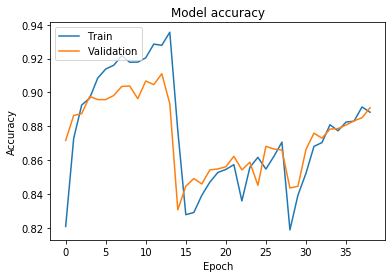

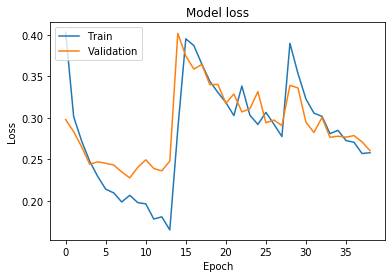

Training bag 1
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 26s - loss: 0.3724 - accuracy: 0.8410 - val_loss: 0.3048 - val_accuracy: 0.8655
Epoch 2/100
13437/13437 - 24s - loss: 0.2864 - accuracy: 0.8822 - val_loss: 0.2886 - val_accuracy: 0.8770
Epoch 3/100
13437/13437 - 24s - loss: 0.3409 - accuracy: 0.8512 - val_loss: 0.2940 - val_accuracy: 0.8596
Epoch 4/100
13437/13437 - 24s - loss: 0.2683 - accuracy: 0.8884 - val_loss: 0.2788 - val_accuracy: 0.8800
Epoch 5/100
13437/13437 - 24s - loss: 0.2489 - accuracy: 0.8974 - val_loss: 0.2574 - val_accuracy: 0.8891
Epoch 6/100
13437/13437 - 24s - loss: 0.2327 - accuracy: 0.9060 - val_loss: 0.2662 - val_accuracy: 0.8813
Epoch 7/100
13437/13437 - 24s - loss: 0.2220 - accuracy: 0.9087 - val_loss: 0.2453 - val_accuracy: 0.8939
Epoch 8/100
13437/13437 - 24s - loss: 0.2054 - accuracy: 0.9169 - val_loss: 0.2354 - val_accuracy: 0.9003
Epoch 9/100
13437/13437 - 24s - loss: 0.1990 - accuracy: 0.9219 - val_loss: 0.2434 - val

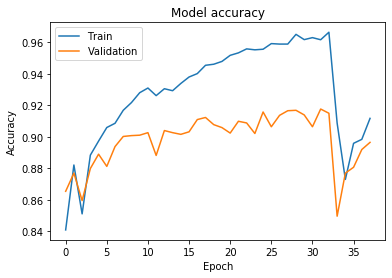

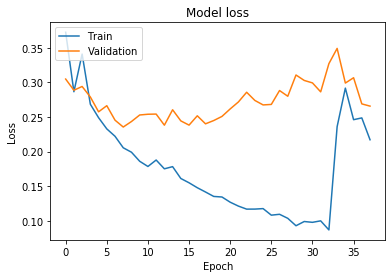

Training bag 2
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3702 - accuracy: 0.8427 - val_loss: 0.2944 - val_accuracy: 0.8743
Epoch 2/100
13437/13437 - 23s - loss: 0.2820 - accuracy: 0.8843 - val_loss: 0.2630 - val_accuracy: 0.8888
Epoch 3/100
13437/13437 - 23s - loss: 0.2551 - accuracy: 0.8968 - val_loss: 0.3005 - val_accuracy: 0.8722
Epoch 4/100
13437/13437 - 23s - loss: 0.3102 - accuracy: 0.8680 - val_loss: 0.2816 - val_accuracy: 0.8842
Epoch 5/100
13437/13437 - 24s - loss: 0.2538 - accuracy: 0.8959 - val_loss: 0.2630 - val_accuracy: 0.8864
Epoch 6/100
13437/13437 - 24s - loss: 0.2261 - accuracy: 0.9085 - val_loss: 0.2725 - val_accuracy: 0.8826
Epoch 7/100
13437/13437 - 24s - loss: 0.2231 - accuracy: 0.9094 - val_loss: 0.2467 - val_accuracy: 0.8950
Epoch 8/100
13437/13437 - 24s - loss: 0.1978 - accuracy: 0.9203 - val_loss: 0.2483 - val_accuracy: 0.8982
Epoch 9/100
13437/13437 - 24s - loss: 0.1878 - accuracy: 0.9259 - val_loss: 0.2595 - val

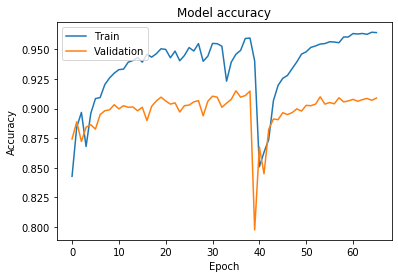

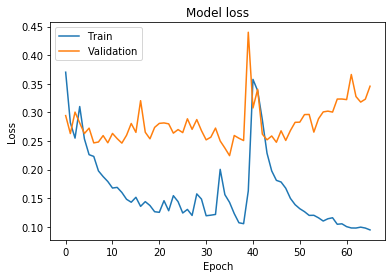

Training bag 3
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 25s - loss: 0.3722 - accuracy: 0.8424 - val_loss: 0.3038 - val_accuracy: 0.8765
Epoch 2/100
13437/13437 - 23s - loss: 0.2920 - accuracy: 0.8813 - val_loss: 0.2686 - val_accuracy: 0.8853
Epoch 3/100
13437/13437 - 23s - loss: 0.2736 - accuracy: 0.8872 - val_loss: 0.2609 - val_accuracy: 0.8867
Epoch 4/100
13437/13437 - 23s - loss: 0.2486 - accuracy: 0.8986 - val_loss: 0.2506 - val_accuracy: 0.8968
Epoch 5/100
13437/13437 - 23s - loss: 0.2279 - accuracy: 0.9085 - val_loss: 0.2590 - val_accuracy: 0.8963
Epoch 6/100
13437/13437 - 23s - loss: 0.2085 - accuracy: 0.9193 - val_loss: 0.2528 - val_accuracy: 0.9049
Epoch 7/100
13437/13437 - 23s - loss: 0.1995 - accuracy: 0.9204 - val_loss: 0.2291 - val_accuracy: 0.9059
Epoch 8/100
13437/13437 - 23s - loss: 0.1869 - accuracy: 0.9245 - val_loss: 0.2322 - val_accuracy: 0.9038
Epoch 9/100
13437/13437 - 23s - loss: 0.1798 - accuracy: 0.9309 - val_loss: 0.2238 - val

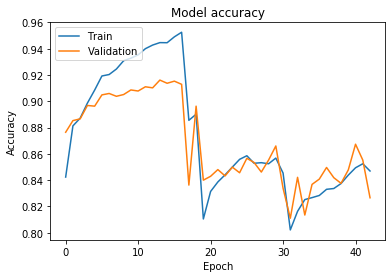

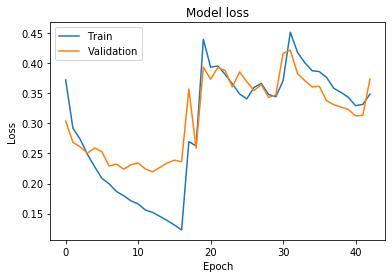

Training bag 4
Train on 13437 samples, validate on 3732 samples
Epoch 1/100
13437/13437 - 27s - loss: 0.3692 - accuracy: 0.8473 - val_loss: 0.3047 - val_accuracy: 0.8722
Epoch 2/100
13437/13437 - 23s - loss: 0.2819 - accuracy: 0.8848 - val_loss: 0.2779 - val_accuracy: 0.8856
Epoch 3/100
13437/13437 - 24s - loss: 0.2446 - accuracy: 0.9020 - val_loss: 0.2602 - val_accuracy: 0.8888
Epoch 4/100
13437/13437 - 24s - loss: 0.2270 - accuracy: 0.9062 - val_loss: 0.2483 - val_accuracy: 0.8963
Epoch 5/100
13437/13437 - 24s - loss: 0.2101 - accuracy: 0.9168 - val_loss: 0.2599 - val_accuracy: 0.8936
Epoch 6/100
13437/13437 - 24s - loss: 0.1935 - accuracy: 0.9220 - val_loss: 0.2431 - val_accuracy: 0.8982
Epoch 7/100
13437/13437 - 24s - loss: 0.2037 - accuracy: 0.9164 - val_loss: 0.2666 - val_accuracy: 0.8939
Epoch 8/100
13437/13437 - 23s - loss: 0.1829 - accuracy: 0.9242 - val_loss: 0.2439 - val_accuracy: 0.8992
Epoch 9/100
13437/13437 - 24s - loss: 0.1715 - accuracy: 0.9325 - val_loss: 0.2598 - val

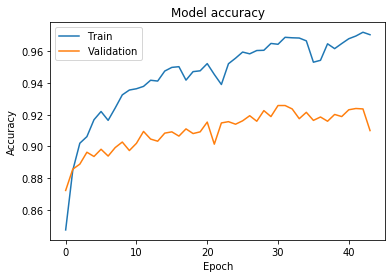

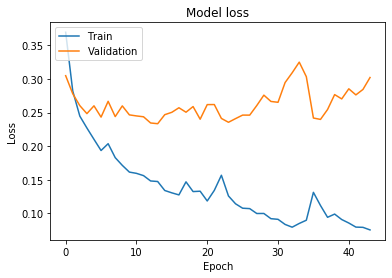

In [3]:
num_of_bags = 5
epochs_per_bag = 100

import os
import matplotlib.pyplot as plt
%matplotlib inline

for bag in range(num_of_bags):
    print("Training bag "+str(bag))

    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=30, 
        mode='auto', 
        restore_best_weights=True)
    
    
    # Put data into bags
    idx = np.random.randint(train_data_x.shape[0], size=train_data_x.shape[0]//10*9)
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]

    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=64,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 5)
(6051,)




## Save Prediction to CSV

In [7]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_simple_lstm_bagging.csv
